In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import random

In [ ]:
salary_data = pd.read_csv('/content/kaggle_survey_2020_responses.csv')
salary_data.head()

,time_from_start_to_finish_seconds,q1,q2,q3,q4,q5,q6,q7_part_1,q7_part_2,q7_part_3,...,q35_b_part_2,q35_b_part_3,q35_b_part_4,q35_b_part_5,q35_b_part_6,q35_b_part_7,q35_b_part_8,q35_b_part_9,q35_b_part_10,q35_b_other
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
salary_data['q30'].fillna(0,inplace=True)
salary_data['q30'].mask(salary_data['q30']!=0,1,inplace=True)
# salary_data['q30'] = salary_data['q30'].astype(int)

In [ ]:
salary_data['q32'].fillna(0,inplace=True)
salary_data['q32'].mask(salary_data['q32']!=0,1,inplace=True)

In [ ]:
print(salary_data['q32'])

0        0
1        1
2        0
3        0
4        0
        ..
20031    0
20032    0
20033    0
20034    0
20035    0
Name: q32, Length: 20036, dtype: object


In [ ]:
salary_data.drop('q33_a_part_7', axis = 1, inplace = True)
df = salary_data.iloc[:,190:197]
df.fillna(0, inplace = True)
k = 0
l = list()
for j in range(0,20036):
    for i in range(0,7):
        if (df[df.columns[i]][j] !=0):
            k+=1
    if (k>0):
        l.append(1)
    else:
        l.append(0)
    k = 0
salary_data['q33'] = l

In [ ]:
salary_data['q33'].value_counts()

0    18020
1     2016
Name: q33, dtype: int64

In [ ]:
salary_data.iloc[:,190:198]

,q33_a_part_1,q33_a_part_2,q33_a_part_3,q33_a_part_4,q33_a_part_5,q33_a_part_6,q33_a_other,q34_a_part_1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
20031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# !pip install dabl

In [ ]:
df1 = salary_data.iloc[:,1:20]
df1

,q1,q2,q3,q4,q5,q6,q7_part_1,q7_part_2,q7_part_3,q7_part_4,q7_part_5,q7_part_6,q7_part_7,q7_part_8,q7_part_9,q7_part_10,q7_part_11,q7_part_12,q7_other
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,NaN,NaN,Javascript,NaN,NaN,NaN,MATLAB,NaN,Other
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20032,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,C,NaN,Java,Javascript,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = salary_data.iloc[:,47:52]
df2

,q11,q12_part_1,q12_part_2,q12_part_3,q12_other
0,"A cloud computing platform (AWS, Azure, GCP, h...",GPUs,NaN,NaN,NaN
1,A personal computer or laptop,GPUs,NaN,NaN,NaN
2,A personal computer or laptop,NaN,NaN,None,NaN
3,"A cloud computing platform (AWS, Azure, GCP, h...",NaN,NaN,None,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
20031,NaN,NaN,NaN,NaN,NaN
20032,A personal computer or laptop,GPUs,NaN,NaN,NaN
20033,A personal computer or laptop,NaN,NaN,None,NaN
20034,"A cloud computing platform (AWS, Azure, GCP, h...",GPUs,NaN,NaN,NaN


In [ ]:
df3 = salary_data.iloc[:,53:66]
df3

,q14_part_1,q14_part_2,q14_part_3,q14_part_4,q14_part_5,q14_part_6,q14_part_7,q14_part_8,q14_part_9,q14_part_10,q14_part_11,q14_other,q15
0,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geoplotlib,NaN,NaN,NaN,1-2 years
1,Matplotlib,Seaborn,NaN,Ggplot / ggplot2,Shiny,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
2,NaN,NaN,NaN,NaN,NaN,D3 js,NaN,NaN,NaN,NaN,NaN,NaN,I do not use machine learning methods
3,Matplotlib,Seaborn,Plotly / Plotly Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-4 years
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20032,Matplotlib,Seaborn,NaN,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-2 years
20033,Matplotlib,Seaborn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I do not use machine learning methods
20034,Matplotlib,Seaborn,Plotly / Plotly Express,Ggplot / ggplot2,NaN,NaN,NaN,NaN,NaN,Leaflet / Folium,NaN,NaN,1-2 years


In [ ]:
df4 = salary_data.iloc[:,82:94]
df4

,q17_part_1,q17_part_2,q17_part_3,q17_part_4,q17_part_5,q17_part_6,q17_part_7,q17_part_8,q17_part_9,q17_part_10,q17_part_11,q17_other
0,NaN,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Bayesian Approaches,NaN,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,NaN,Recurrent Neural Networks,NaN,NaN,NaN
1,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,Convolutional Neural Networks,NaN,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",Bayesian Approaches,NaN,"Dense Neural Networks (MLPs, etc)",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20032,Linear or Logistic Regression,Decision Trees or Random Forests,NaN,NaN,NaN,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,NaN,NaN,"Transformer Networks (BERT, gpt-3, etc)",NaN,NaN
20033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20034,Linear or Logistic Regression,Decision Trees or Random Forests,"Gradient Boosting Machines (xgboost, lightgbm,...",NaN,NaN,"Dense Neural Networks (MLPs, etc)",Convolutional Neural Networks,NaN,Recurrent Neural Networks,NaN,NaN,NaN


In [ ]:
df5 = salary_data.iloc[:,107:110]
df5

,q20,q21,q22
0,NaN,NaN,NaN
1,"10,000 or more employees",20,"We have well established ML methods (i.e., mod..."
2,"1000-9,999 employees",0,No (we do not use ML methods)
3,250-999 employees,5-9,"We have well established ML methods (i.e., mod..."
4,NaN,NaN,NaN
...,...,...,...
20031,NaN,NaN,NaN
20032,NaN,NaN,NaN
20033,0-49 employees,0,We are exploring ML methods (and may one day p...
20034,"10,000 or more employees",20,"We recently started using ML methods (i.e., mo..."


In [ ]:
df_visualisation = pd.concat([df1,df2,df3,df4,df5,salary_data['q33'],salary_data['q24']],axis=1)

In [ ]:
len(df_visualisation.columns)

54

In [ ]:
df_visualisation['q3'].unique()

array(['Colombia', 'United States of America', 'Argentina', 'Japan',
       'India', 'Brazil', 'China', 'Germany', 'Indonesia', 'Canada',
       'Switzerland', 'Other', 'Singapore', 'Russia', 'South Africa',
       'Egypt', 'Netherlands', 'Pakistan', 'Nepal', 'South Korea',
       'Poland', 'Belarus', 'Tunisia', 'Ukraine', 'Belgium',
       'Saudi Arabia', 'Taiwan', 'Nigeria', 'Italy', 'Spain',
       'United Arab Emirates', 'Mexico', 'Viet Nam', 'Thailand',
       'United Kingdom of Great Britain and Northern Ireland', 'France',
       'Ghana', 'Ireland', 'Philippines', 'Morocco', 'Turkey',
       'Iran, Islamic Republic of...', 'Peru', 'Romania',
       'Republic of Korea', 'Australia', 'Chile', 'Kenya', 'Sweden',
       'Bangladesh', 'Greece', 'Malaysia', 'Portugal', 'Israel',
       'Sri Lanka'], dtype=object)

In [ ]:
continent_dict = {
    'Asia': ['Malaysia','Turkey','Thailand','Japan', 'India', 'China', 'Indonesia', 'Singapore', 'Russia', 'Pakistan', 'Nepal', 'South Korea', 'Taiwan', 'Viet Nam', 'Bangladesh', 'Israel', 'Iran, Islamic Republic of...', 'Republic of Korea', 'Sri Lanka','Saudi Arabia','United Arab Emirates','Philippines'],
    'Africa': ['Colombia', 'Egypt', 'South Africa', 'Nigeria', 'Ghana', 'Morocco', 'Kenya','Tunisia'],
    'North America': ['United States of America', 'Canada', 'Mexico'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Peru'],
    'Europe': ['Romania','Germany', 'Switzerland', 'Netherlands', 'Belgium', 'Italy', 'Spain', 'United Kingdom of Great Britain and Northern Ireland', 'France', 'Ireland', 'Poland', 'Belarus', 'Ukraine', 'Romania', 'Sweden', 'Greece', 'Portugal'],
    'Australia': ['Australia'],
    'Others':['Other']

}
df_visualisation['q3_new'] = df_visualisation['q3'].apply(lambda x: next((continent for continent, countries in continent_dict.items() if x in countries), 'Unknown'))

In [ ]:
df_visualisation['q3_new'].value_counts()

Asia             10326
Europe            2908
North America     2765
Africa            1410
Others            1388
South America     1008
Australia          231
Name: q3_new, dtype: int64

In [ ]:
df_visualisation['q24'].value_counts()

$0-999             2128
10,000-14,999       665
1,000-1,999         581
100,000-124,999     573
40,000-49,999       552
30,000-39,999       540
50,000-59,999       510
5,000-7,499         488
15,000-19,999       449
60,000-69,999       408
20,000-24,999       404
70,000-79,999       394
7,500-9,999         371
150,000-199,999     347
2,000-2,999         330
125,000-149,999     315
25,000-29,999       310
90,000-99,999       280
4,000-4,999         279
80,000-89,999       273
3,000-3,999         264
200,000-249,999     115
300,000-500,000      55
> $500,000           50
250,000-299,999      48
Name: q24, dtype: int64

In [ ]:
import pandas as pd

# Sample data with 'q24' column representing salary ranges
data = {
    'q24': ['$0-999', '10,000-14,999', '$1,000-1,999', '$100,000-124,999', '$40,000-49,999',
            '$30,000-39,999', '$50,000-59,999', '$5,000-7,499', '$15,000-19,999', '$60,000-69,999',
            '$20,000-24,999', '$70,000-79,999', '$7,500-9,999', '$150,000-199,999', '$2,000-2,999',
            '$125,000-149,999', '$25,000-29,999', '$90,000-99,999', '$4,000-4,999', '$80,000-89,999',
            '$3,000-3,999', '$200,000-249,999', '$300,000-500,000', '> $500,000', '$250,000-299,999']
}

# # Create a DataFrame
# df = pd.DataFrame(data)
df_visualisation = df_visualisation.dropna(subset=['q24'])
# Convert 'q24' salary ranges to numerical values
df_visualisation['q24'] = df_visualisation['q24'].str.replace(',', '').str.extract('(\d+)').astype(int)

# Define bins for the new categories
bins = [0, 5000, 20000, 50000, 100000, 250000, float('inf')]
labels = ['0-5k', '5k-20k', '20k-50k', '50k-100k', '100k-250k', '>250k']

# Bin the 'q24' salary values and create a new column 'salary_category'
df_visualisation['salary_category'] = pd.cut(df_visualisation['q24'], bins=bins, labels=labels, right=False)

# Print the DataFrame with the new 'salary_category' column
print(df_visualisation)


          q1   q2                        q3                      q4  \
1      30-34  Man  United States of America         Master’s degree   
2      35-39  Man                 Argentina       Bachelor’s degree   
3      30-34  Man  United States of America         Master’s degree   
8      35-39  Man                   Germany         Doctoral degree   
11     35-39  Man  United States of America         Doctoral degree   
...      ...  ...                       ...                     ...   
20024  35-39  Man                  Malaysia  I prefer not to answer   
20029  35-39  Man                  Thailand       Bachelor’s degree   
20033  30-34  Man                    Brazil         Master’s degree   
20034  22-24  Man                     India       Bachelor’s degree   
20035  22-24  Man                  Pakistan         Master’s degree   

                              q5           q6 q7_part_1 q7_part_2 q7_part_3  \
1                  Data Engineer   5-10 years    Python         R   

<ipython-input-49-ddc9e909ef6e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visualisation['q24'] = df_visualisation['q24'].str.replace(',', '').str.extract('(\d+)').astype(int)
<ipython-input-49-ddc9e909ef6e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_visualisation['salary_category'] = pd.cut(df_visualisation['q24'], bins=bins, labels=labels, right=False)


In [ ]:
f = df_visualisation.groupby('q3_new')
f

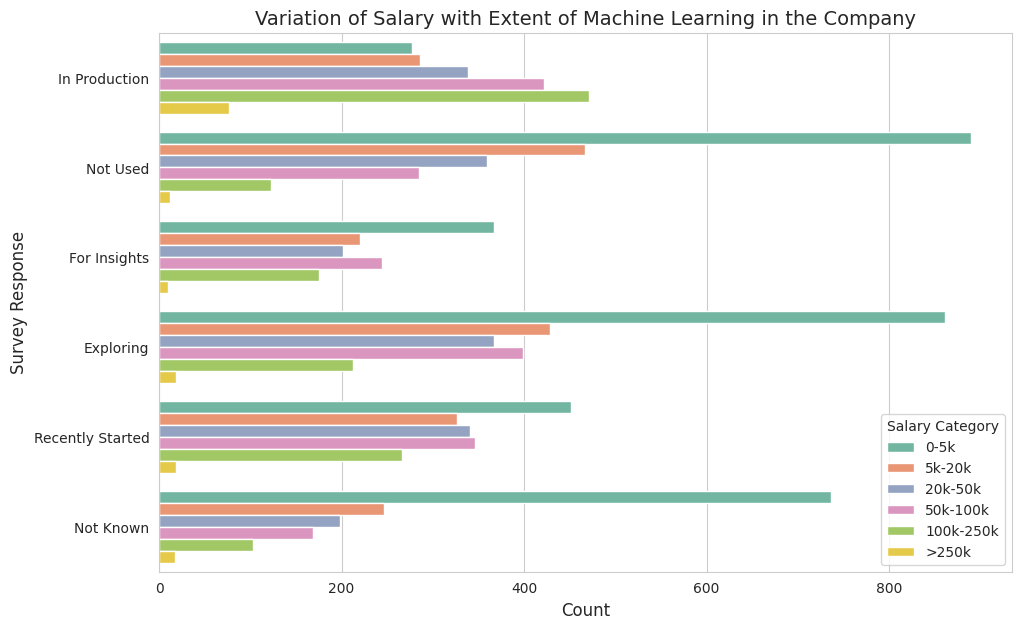

In [ ]:
order = []

plt.rcParams['figure.figsize'] = (11,7)
g = sns.countplot(data = df_visualisation, hue = 'salary_category', y = 'q22', palette = 'Set2')
g.set_yticklabels(['In Production','Not Used','For Insights','Exploring','Recently Started','Not Known'])

# Set axis labels and plot title
g.set_xlabel("Count", fontsize=12)
g.set_ylabel("Survey Response", fontsize=12)
plt.title("Variation of Salary with Extent of Machine Learning in the Company", fontsize=14)

# Improve the legend
g.legend(title='Salary Category')

# Customize the plot's style
sns.set_style("whitegrid")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig("extent_of_ml.jpg", dpi=800)
# Show the plot
plt.show()

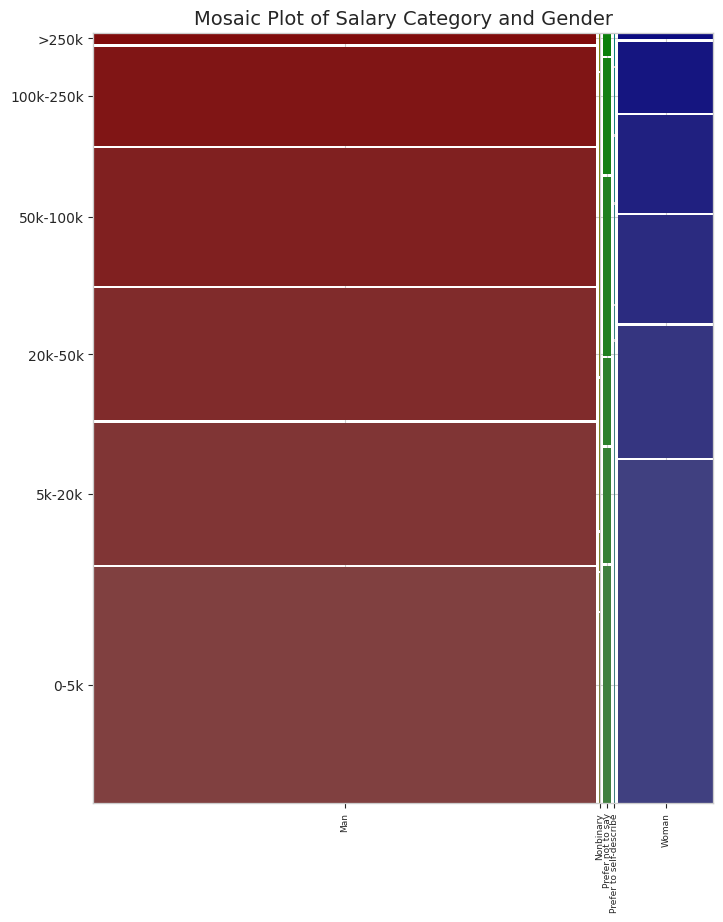

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic



def f(df_visualisation):
    return("")

fig, ax = plt.subplots(figsize=(8, 10))
mosaic(df_visualisation, ['q2','salary_category'], ax = ax, labelizer = f)

for label in ax.get_xticklabels():
    label.set_rotation(90)

for label in ax.get_xticklabels():
    label.set_fontsize(6.5)

plt.title("Mosaic Plot of Salary Category and Gender", fontsize = 14)

plt.savefig("mosaic plot of salary-gender.jpg", dpi = 800)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


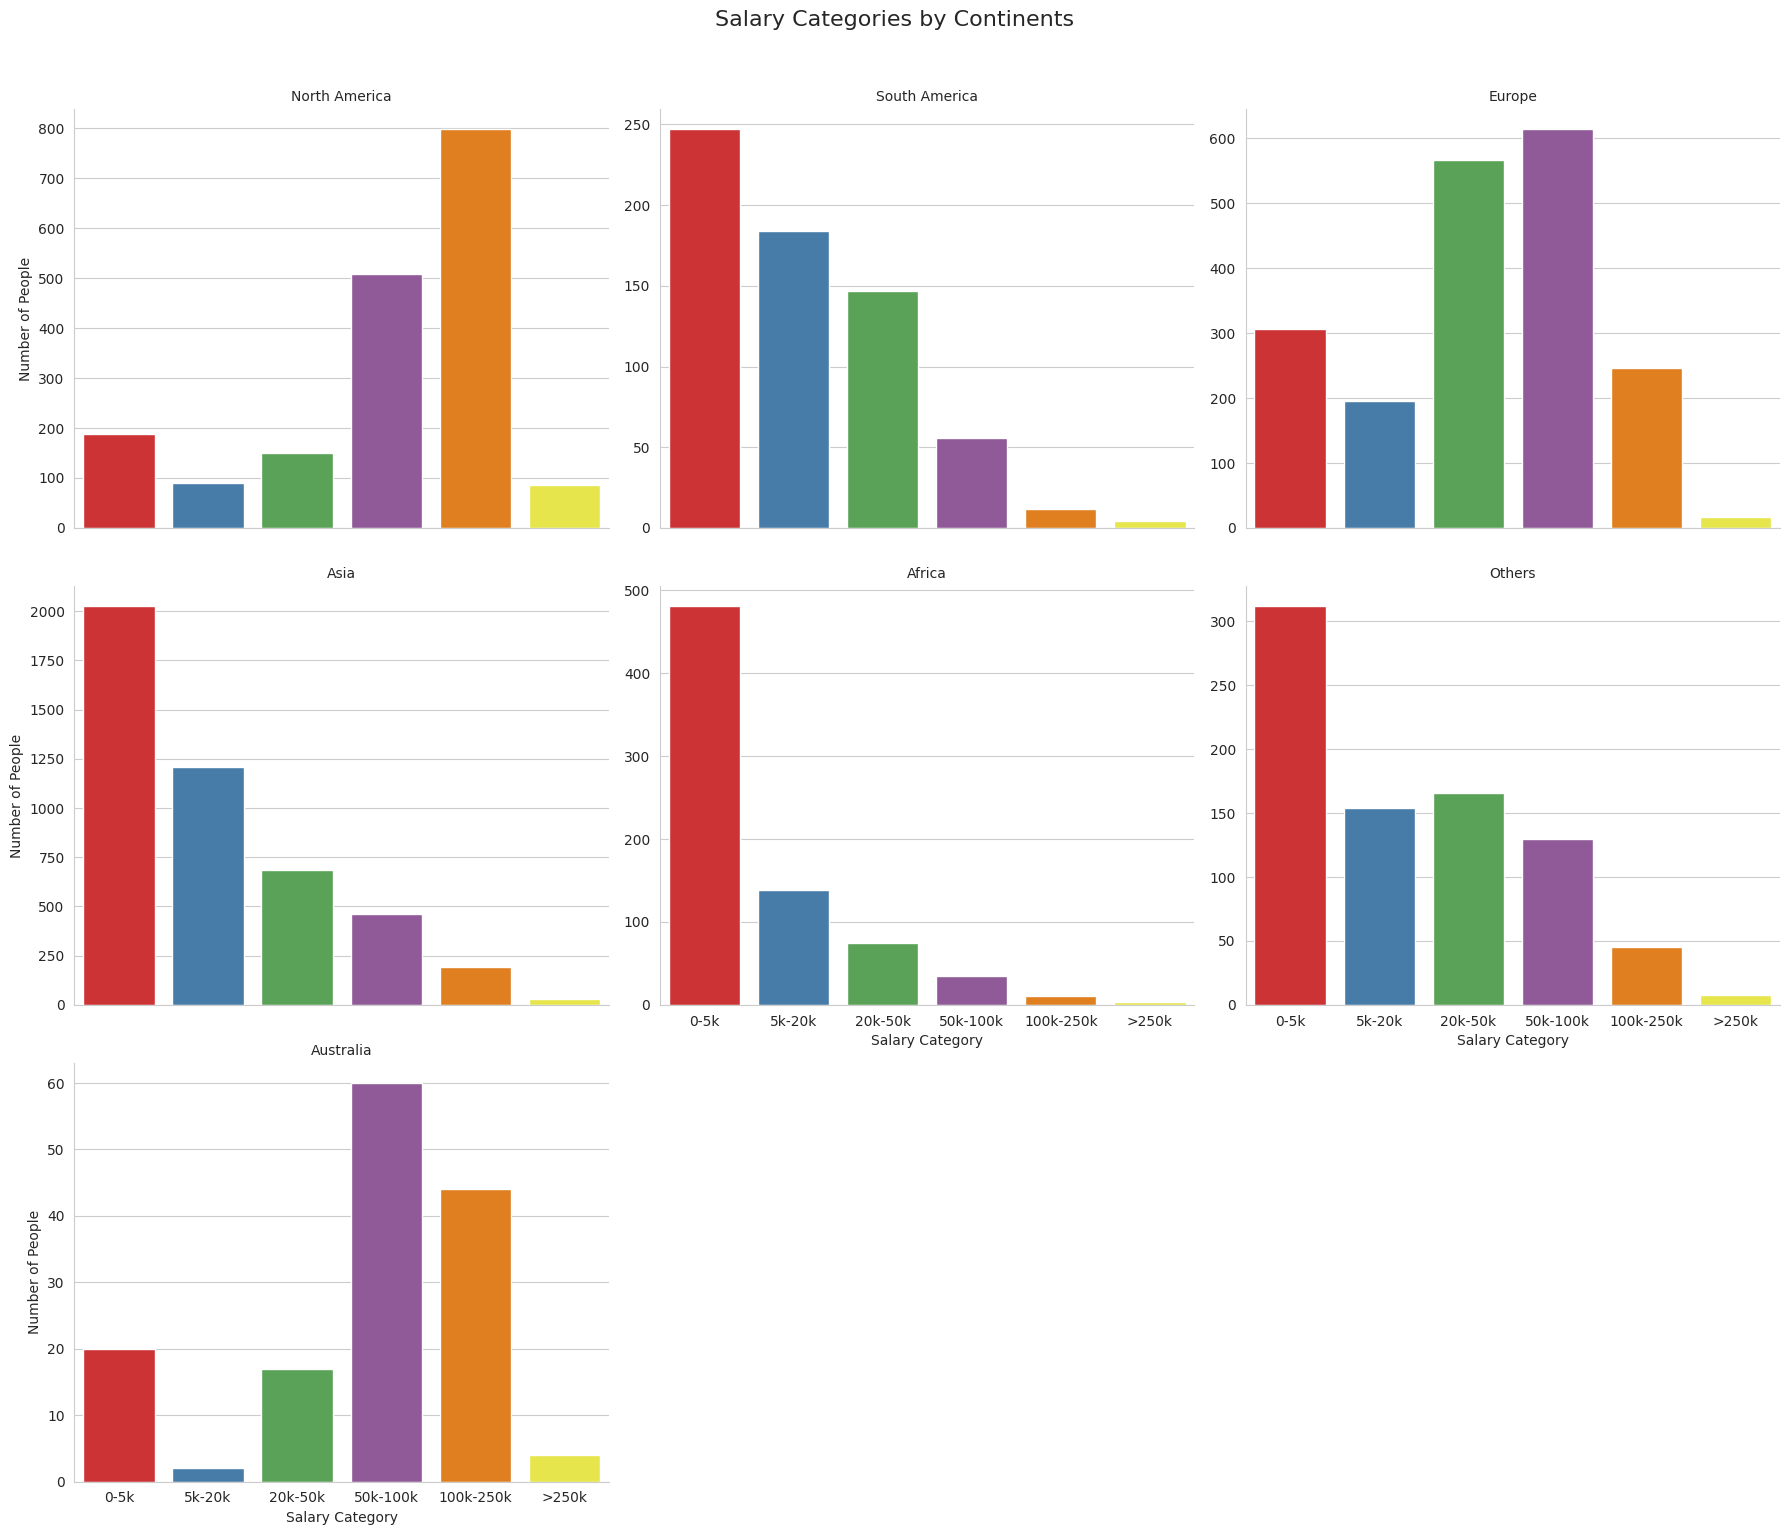

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid based on 'q3_new' (countries) and 'salary_category'
g = sns.FacetGrid(df_visualisation, col="q3_new", col_wrap=3, height=5, aspect=1.2, sharey=False)
g.map(sns.countplot, 'salary_category', palette='Set1', orient='v')  # Set orient='v' for vertical countplot

# Set labels and titles
g.set_axis_labels('Salary Category', 'Number of People')
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Salary Categories by Continents", y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('Salary Categories by Continents.jpg',dpi=800)
plt.show()

This bar chart shows the distribution of salaries faceted by the continents.
There is a clear suggestion that the pay scale is significantly higher in North America, Europe and Australia. For Asia and Africa, one may observe that the proportion of employees in a salary bracket is inversely proportional to the actual salary.

In [ ]:
df_visualisation.to_csv("Data_visualisation.csv")

In [ ]:
import pandas as pd
import numpy as np

# Create a mapping count table based on combinations of 'salary' and 'employee_category'
mapping_counts = df_visualisation.groupby(['salary_category', 'q20']).size().reset_index(name='count')

# Find the most common 'employee_category' for each 'salary' category
most_common_categories = mapping_counts.groupby('salary_category')['q20', 'count'].max()

# Function to impute 'employee_category' based on 'salary' using the most common category mapping
def impute_employee_category(row):
    if pd.isnull(row['q20']):
        salary = row['salary_category']
        if salary in most_common_categories.index:
            return most_common_categories.loc[salary]['q20']
    return row['q20']

# Apply the imputation function to the DataFrame where 'employee_category' is NaN
df_visualisation['q20'] = df_visualisation.apply(impute_employee_category, axis=1)

<ipython-input-55-ba08e0f87053>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_common_categories = mapping_counts.groupby('salary_category')['q20', 'count'].max()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


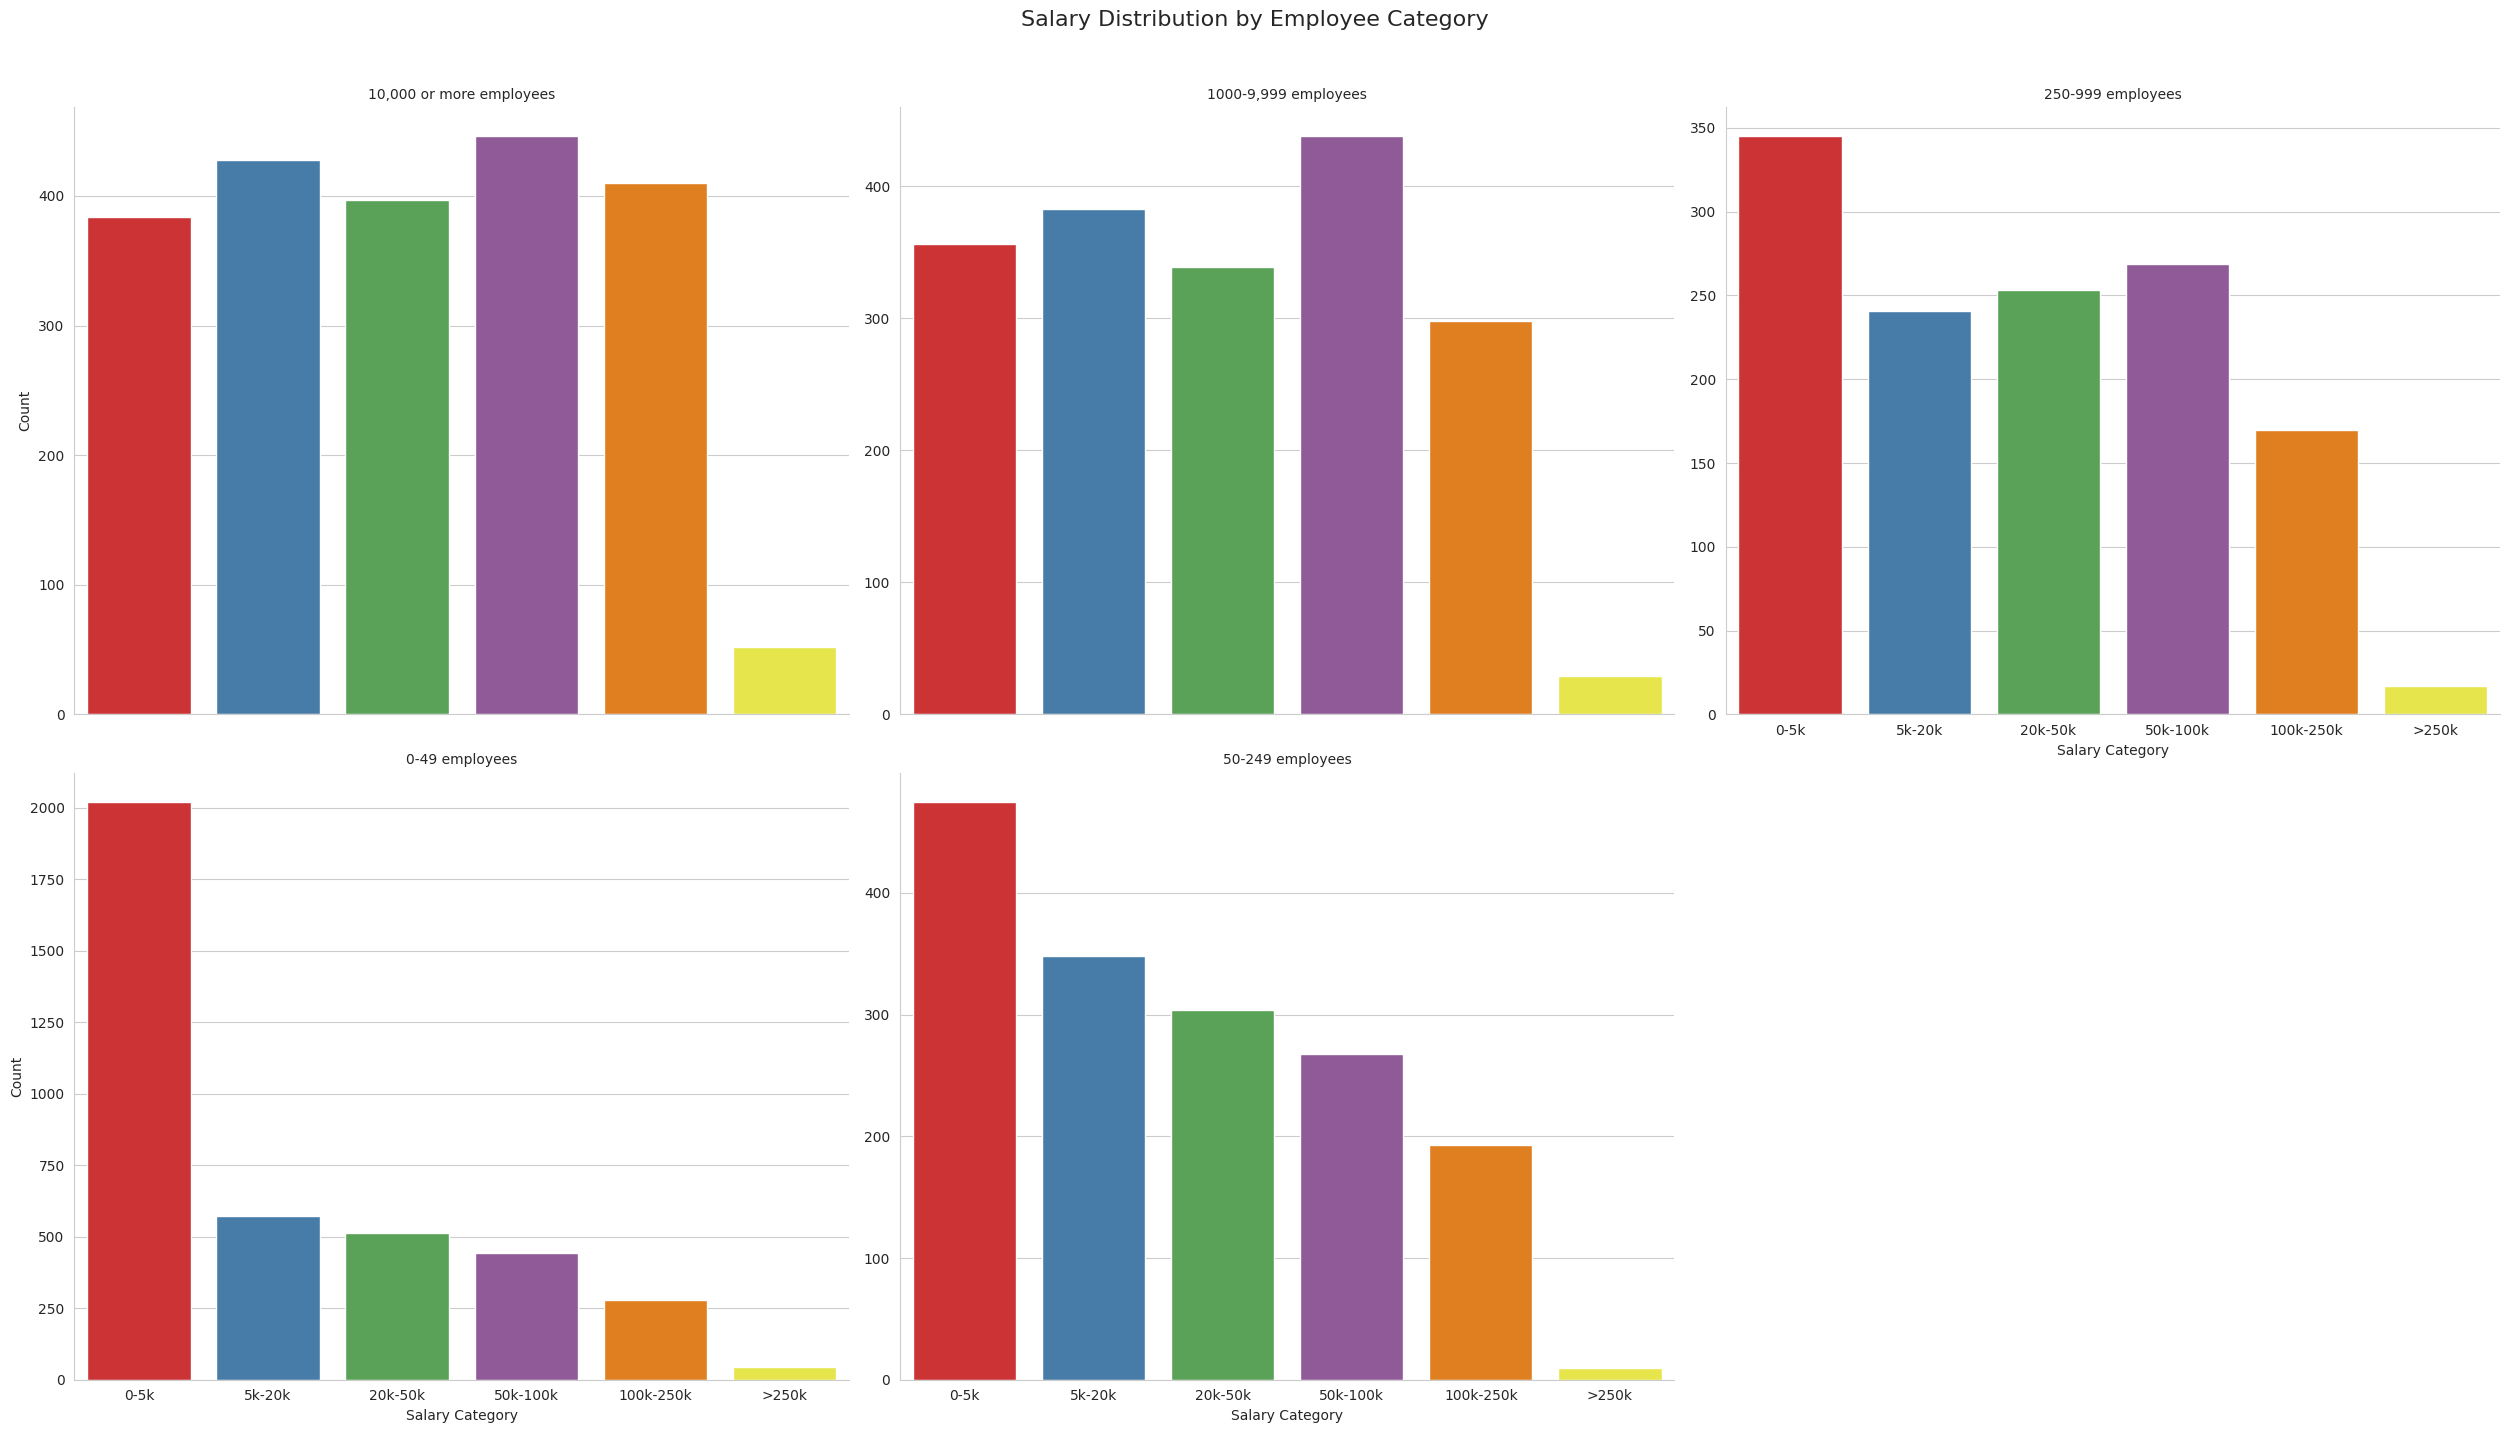

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid based on 'q3_new' (countries) and 'salary_category'
g = sns.FacetGrid(df_visualisation, col="q20", col_wrap=3, height=7, aspect=1.2, sharey=False)
g.map(sns.countplot, 'salary_category', palette='Set1', orient='v')  # Set orient='v' for vertical countplot

# Set labels and titles
g.set_axis_labels('Salary Category', 'Count')
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Salary Distribution by Employee Category", y=1.02, fontsize=16)
plt.tight_layout()
plt.savefig('Salary Distribution by Employee Category.jpg',dpi=800)
plt.show()

This bar chart shows the distribution of salary broken down by the extent of machine learning. The data is based on a survey of employees, and shows the percentage of employees in each salary category who reported using machine learning in their work.

The chart suggests that in companies where Machine Learning is being used in some way or the other, the total number of employees being paid more than 100k is much higher than companies where there is no usage of ML.

This mosaic plot shows the distribution of salary categories and gender in a company. Each square in the plot represents a different combination of salary category and gender, and the size of the square is proportional to the number of employees in that category.

The plot shows that the highest salary category (>250k) is dominated by males, with other genders representing roughly 20% of employees in this category. The gender gap is also significant in the 100k-250k salary category, with other genders representing only 40% of employees. However, the gender gap narrows in the lower salary categories, with other genders representing close to 50% of employees in the 5k-20k and 20k-50k salary categories.

This plot provides a clear visualization of the gender pay gap prevelant in industries. It also highlights the fact that the gender gap is particularly pronounced in the highest salary categories.


In [ ]:
X = salary_data.drop(columns=['q24'])
y = salary_data['q24']

In [ ]:
import dabl
# dabl.plot(X,y)